In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [2]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

In [3]:
# TESS = 788.7781855
# ZTF-r = 646.375
# LT = 615.8435393
# ZTF-g = 482.950
# PTO = 471.8872246
# WHT = 356.5647932
# NUV = 244.60698626444548
# NUV (2550 - 2950) = 278.9703445161371
# NUV (2150 - 2550) = 235.8028267307681
# NUV (1630 - 2150) = 195.76162964730503
# FUV = 135.89896930381835
# FUV (1520 - 1715) = 159.3242206252428
# FUV (1330 - 1520) = 141.1094441960065
# FUV (1120 - 1330) = 125.81681569145482


wavelengths2 = np.linspace(1e-7, 1e-6, 1000) 

Star = planck(wavelengths2, 7510)


\begin{equation} \label{eq1}
\begin{split}
\LARGE
contrast & = \LARGE \frac{I_{star} - Intensity_{spot}}{I_{star}} \\
 & = \LARGE 1 - \frac{I_{spot}}{I_{star}}
\end{split}
\end{equation}

\begin{equation}
\LARGE
I = \LARGE Intensity
\end{equation}


In [4]:
def find_temp(contrast, wavelengths):
    
    temperatures = np.linspace(5510, 7510, 2001, endpoint=True, dtype=int)
    
    min_res = (10e100)
    
    for temp in temperatures:
        
        Spot_test = planck(wavelengths, temp)
        
        c_test = 1 - (Spot_test / Star_test)
        
        res = np.sum((c_test - contrast)**2)
        
        if res <= min_res:
            min_res = res
            best_temp = temp
    
    Spot_best = planck(wavelengths2, best_temp)
    
    c_best = 1  - (Spot_best / Star)
            
    return best_temp, c_best

# 25 Degrees

In [5]:
contrast = np.array([0.22926,
0.24527,
0.30582,
0.3923,
0.4442,
0.53947,
0.94312,
0.897])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932, 244.60698626444548, 278.9703445161371])*1e-9

Star_test = planck(wavelengths, 7510)

In [6]:
temp_25, contrast_25 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

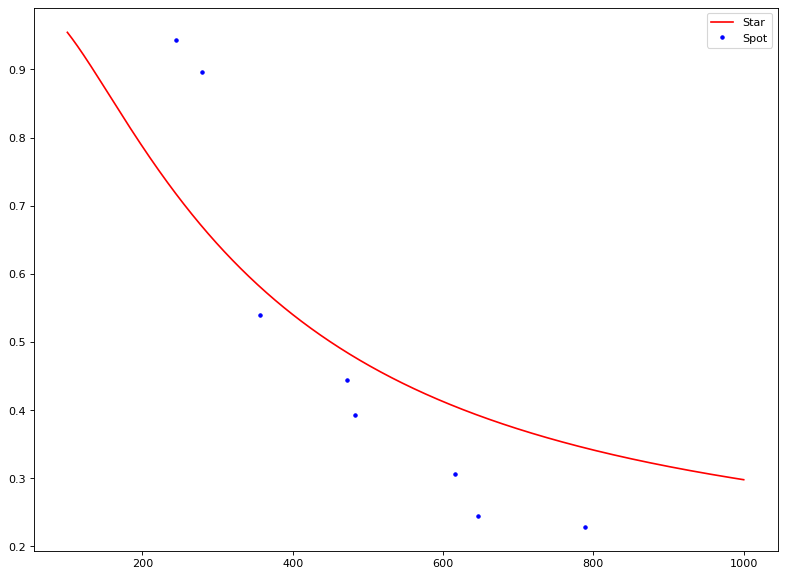

In [7]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_25, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [8]:
temp_25

6468

In [9]:
contrast_2 = np.array([0.22926,
0.24527,
0.30582,
0.3923,
0.4442,
0.53947,])

wavelengths_2 = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932])*1e-9

Star_test = planck(wavelengths_2, 7510)

In [10]:
temp_25_2, contrast_25_2 = find_temp(contrast_2, wavelengths_2)

<Figure size 432x288 with 0 Axes>

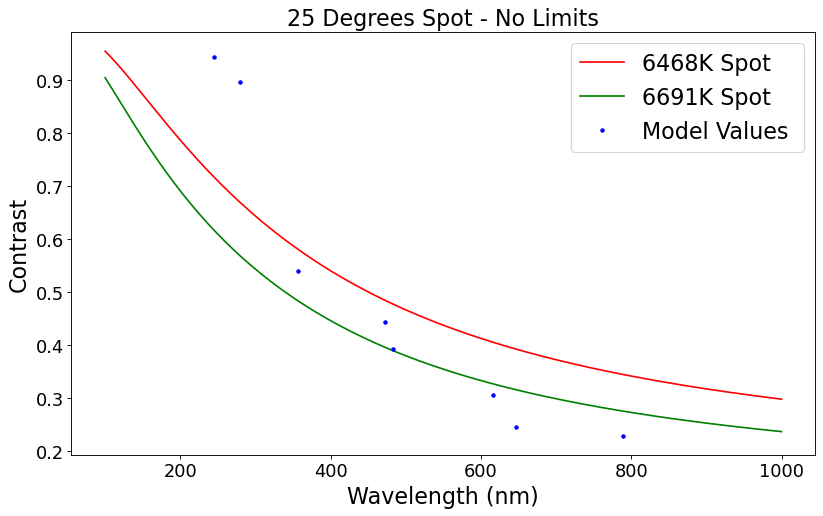

In [11]:
plt.figure()
figure(figsize=(12, 7), dpi=80)
plt.plot(wavelengths2*1e9, contrast_25, 'r-', label=str(temp_25)+'K Spot') 
plt.plot(wavelengths2*1e9, contrast_25_2, 'g-', label=str(temp_25_2)+'K Spot') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Model Values ')
plt.legend(fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)
plt.ylabel("Contrast", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("25 Degrees Spot - No Limits", fontsize=20)
plt.show()

In [12]:
test = planck(wavelengths_2, temp_25_2)
Stest = planck(wavelengths_2, 7510)
con = 1 - (test / Stest)

In [13]:
np.mean(((np.mean(np.abs(con-contrast_2)))/contrast_2)*100)

12.480657085121564

# 30 Degrees

In [14]:
contrast = np.array([0.20019,0.21404,0.2662,0.34013,0.38452,0.46508,0.79935,0.76172,0.9586,0.71971])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932, 244.60698626444548,\
                        278.9703445161371, 235.8028267307681, 195.76162964730503])*1e-9

Star_test = planck(wavelengths, 7510)


In [15]:
temp_30, contrast_30 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

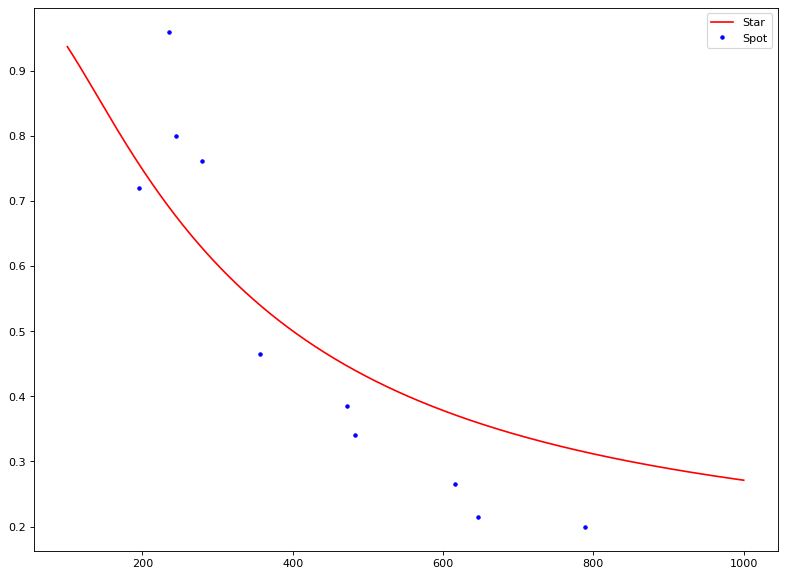

In [16]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_30, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [17]:
temp_30

6566

# 30 Degrees - No Segments

In [18]:
# No FUV

contrast = np.array([0.20019,0.21404,0.2662,0.34013,0.38452,0.46508])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932])*1e-9

Star_test = planck(wavelengths, 7510)

In [19]:
temp_30_2, contrast_30_2 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

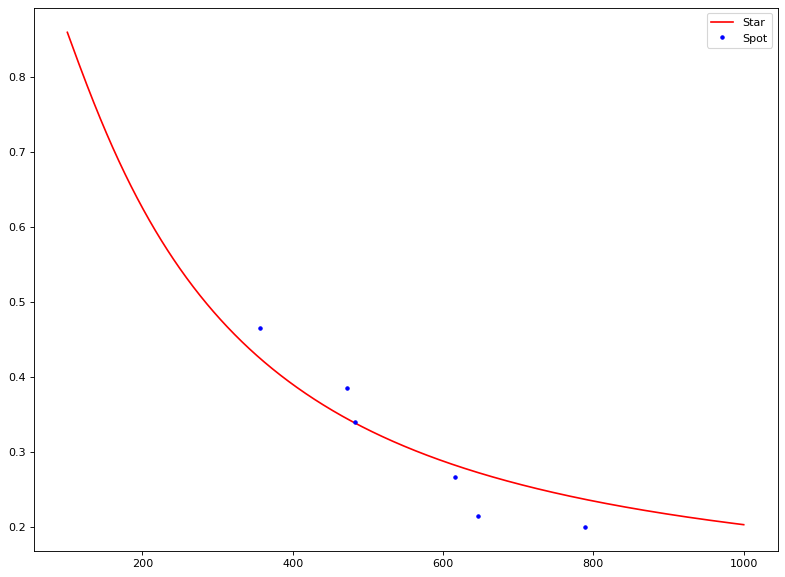

In [20]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_30_2, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [21]:
temp_30_2

6813

# 35 Degrees

In [55]:
contrast = np.array([0.16745,0.17899,0.22228,0.28348,0.32013,0.38632,0.65836,0.628,0.78576,0.59476])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932, 244.60698626444548,\
                        278.9703445161371, 235.8028267307681, 195.76162964730503])*1e-9

Star_test = planck(wavelengths, 7510)

In [49]:
temp_35, contrast_35 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

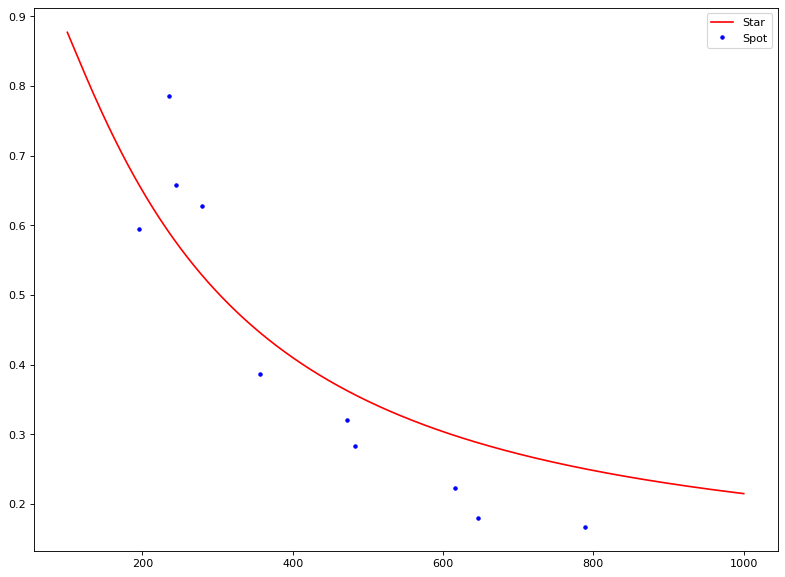

In [50]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_35, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [51]:
temp_35

6770

# 35 Degrees - No Segments

In [52]:
# No FUV

contrast = np.array([0.16745,0.17899,0.22228,0.28348,0.32013,0.38632])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932])*1e-9

Star_test = planck(wavelengths, 7510)

In [53]:
temp_35_2, contrast_35_2 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

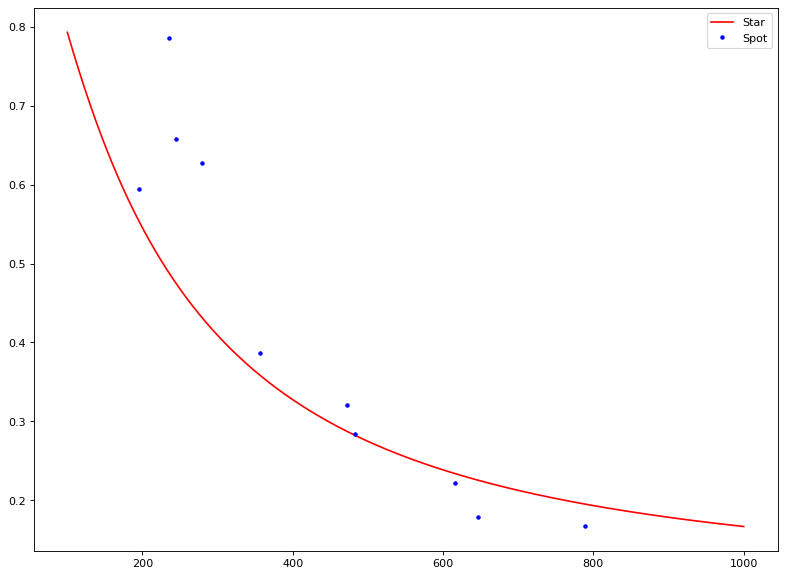

In [56]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_35_2, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [29]:
temp_35_2

6940

# 40 Degrees

In [33]:
contrast = np.array([0.13957,
0.14917,
0.18511,
0.23585,
0.2662,
0.32087,
0.54449,
0.51965,
0.64868,
0.49267,
0.96175])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932, 244.60698626444548,\
                        278.9703445161371, 235.8028267307681, 195.76162964730503, 159.3242206252428])*1e-9

Star_test = planck(wavelengths, 7510)

In [34]:
temp_40, contrast_40 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

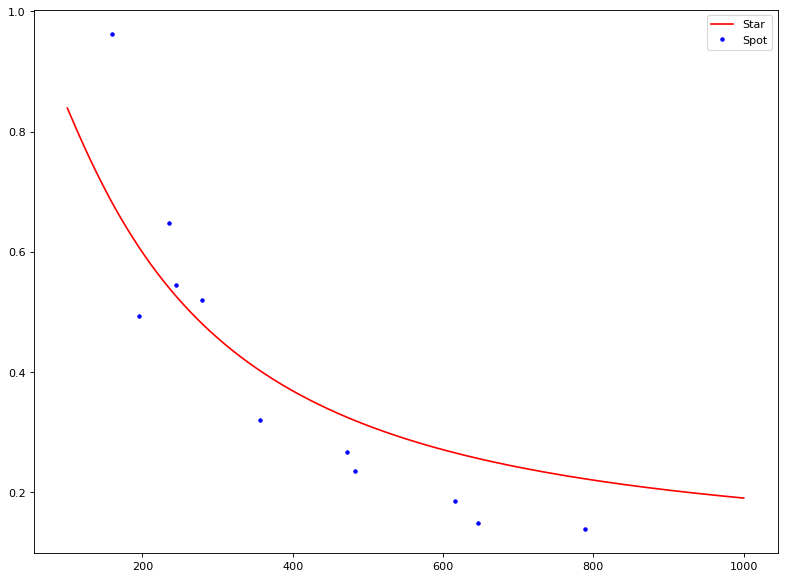

In [35]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_40, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [36]:
temp_40

6857

# 40 Degrees - No Segments

In [37]:
# No FUV

contrast_2 = np.array([0.13957,
0.14917,
0.18511,
0.23585,
0.2662,
0.32087])

wavelengths_2 = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932])*1e-9

Star_test = planck(wavelengths_2, 7510)

In [38]:
temp_40_2, contrast_40_2 = find_temp(contrast_2, wavelengths_2)

<Figure size 432x288 with 0 Axes>

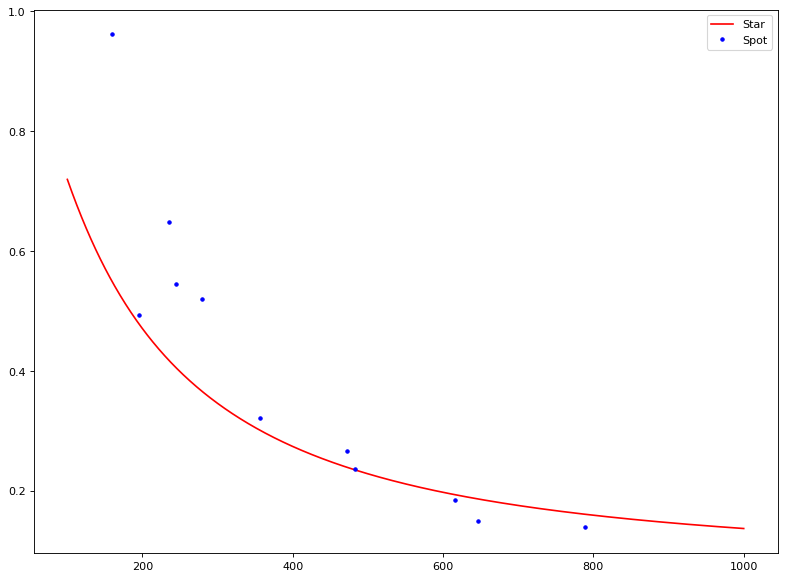

In [39]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_40_2, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [40]:
temp_40_2

7043

# 45 Degrees

In [104]:
contrast = np.array([0.13214,
0.14115,
0.17475,
0.22194,
0.25003,
0.30033,
0.50257,
0.48039,
0.59492,
0.45628])#,
#0.8652])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932, 244.60698626444548,\
                        278.9703445161371, 235.8028267307681, 195.76162964730503])*1e-9
#, 159.3242206252428
Star_test = planck(wavelengths, 7510)

In [105]:
temp_45, contrast_45 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

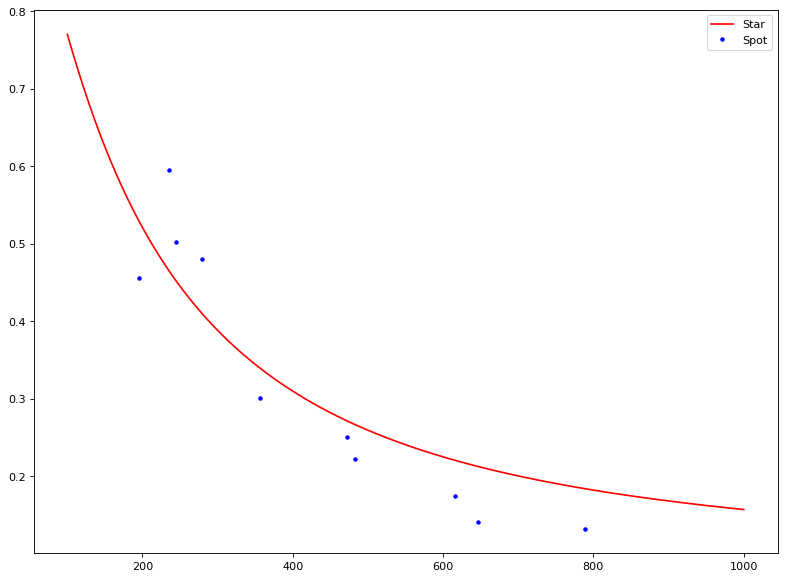

In [106]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_45, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [107]:
temp_45

6975

# 45 Degrees - No Segments

In [108]:
# No FUV

contrast_2 = np.array([0.13214,
0.14115,
0.17475,
0.22194,
0.25003,
0.30033])

wavelengths_2 = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932])*1e-9

Star_test = planck(wavelengths_2, 7510)

In [109]:
temp_45_2, contrast_45_2 = find_temp(contrast_2, wavelengths_2)

<Figure size 432x288 with 0 Axes>

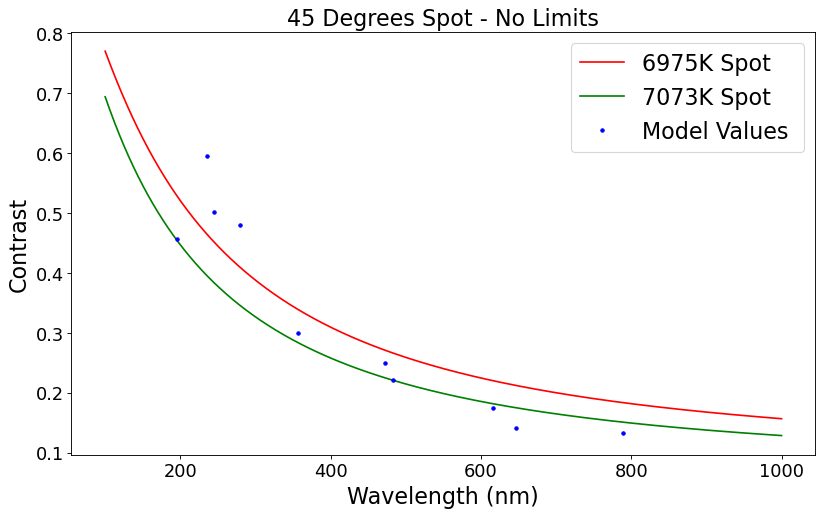

In [112]:
plt.figure()
figure(figsize=(12, 7), dpi=80)
plt.plot(wavelengths2*1e9, contrast_45, 'r-', label=str(temp_45)+'K Spot') 
plt.plot(wavelengths2*1e9, contrast_45_2, 'g-', label=str(temp_45_2)+'K Spot') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Model Values ')
plt.legend(fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)
plt.ylabel("Contrast", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("45 Degrees Spot - No Limits", fontsize=20)
plt.show()

In [111]:
temp_45_2

7073

# 50 Degrees

In [49]:
contrast = np.array([0.13819,
0.14747,
0.18184,
0.22967,
0.2579,
0.30791,
0.50339,
0.4824,
0.58971,
0.45969,
0.83104])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932, 244.60698626444548,\
                        278.9703445161371, 235.8028267307681, 195.76162964730503, 159.3242206252428])*1e-9

Star_test = planck(wavelengths, 7510)

In [50]:
temp_50, contrast_50 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

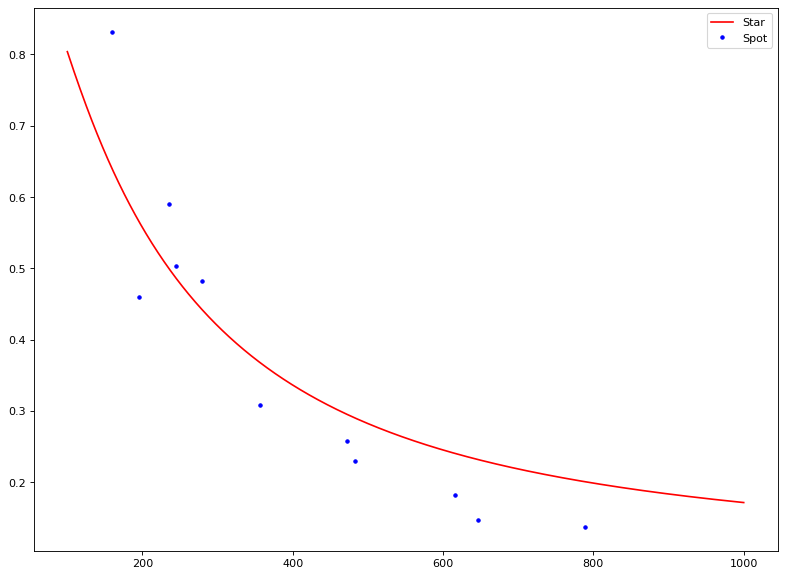

In [51]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_50, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [52]:
temp_50

6922.0

# 50 Degrees - No Segments

In [53]:
# No FUV

contrast = np.array([0.13819,
0.14747,
0.18184,
0.22967,
0.2579,
0.30791,
0.50339])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932, 244.60698626444548])*1e-9

Star_test = planck(wavelengths, 7510)

In [54]:
temp_50_2, contrast_50_2 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

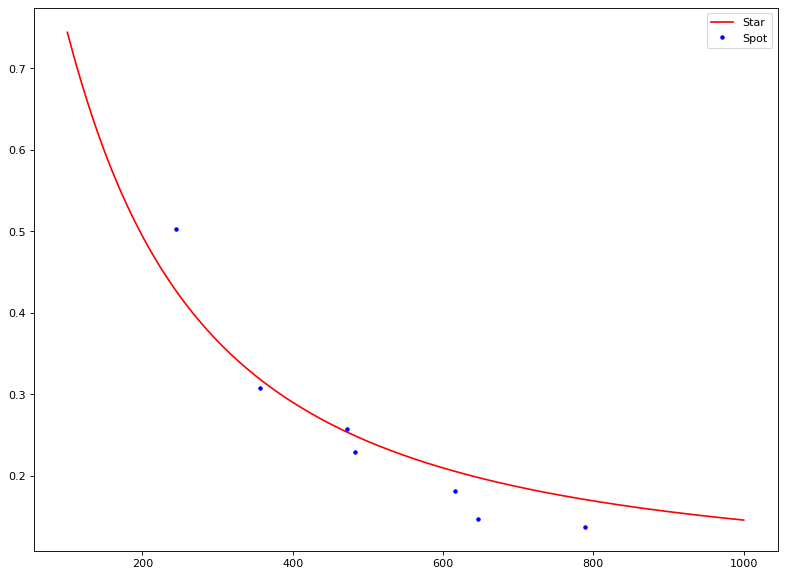

In [55]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_50_2, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [56]:
temp_50_2

7012.0

# 55 Degrees

In [57]:
contrast = np.array([0.15471,
0.1648,
0.20197,
0.25293,
0.2826,
0.3345,
0.52881,
0.50856,
0.6106,
0.48639,
0.99513,
0.82671])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932, 244.60698626444548,\
                        278.9703445161371, 235.8028267307681, 195.76162964730503, 135.89896930381835, 159.3242206252428])*1e-9

Star_test = planck(wavelengths, 7510)

In [58]:
temp_55, contrast_55 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

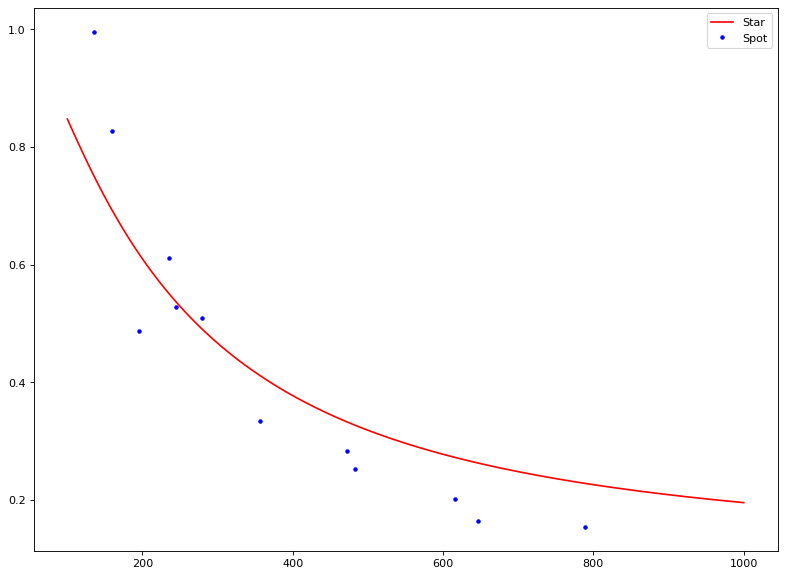

In [59]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_55, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [60]:
temp_55

6839.0

# 55 Degrees - No Segments

In [61]:
contrast = np.array([0.15471,
0.1648,
0.20197,
0.25293,
0.2826,
0.3345,
0.52881,
0.99513])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932, 244.60698626444548,\
                        135.89896930381835])*1e-9

Star_test = planck(wavelengths, 7510)

In [62]:
temp_55_2, contrast_55_2 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

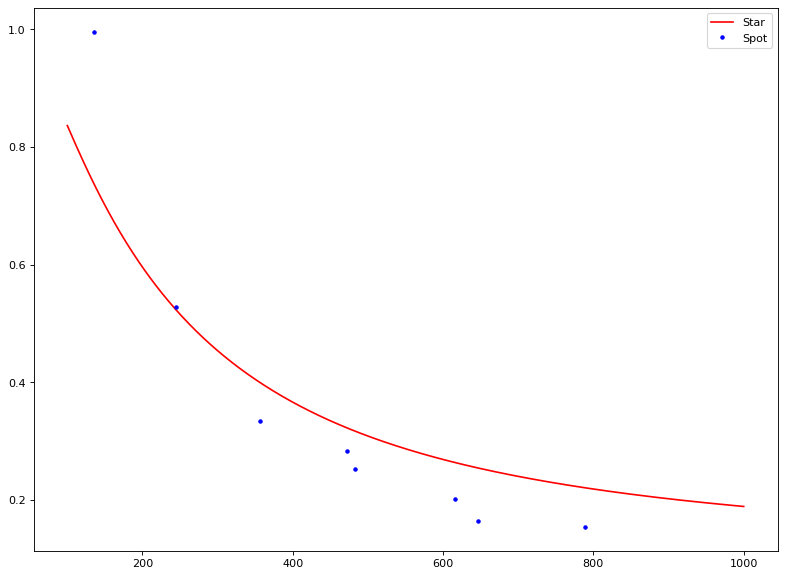

In [63]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_55_2, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [64]:
temp_55_2

6862.0

# 60 Degrees

In [123]:
contrast = np.array([0.18234,
0.19376,
0.23545,
0.29142,
0.32339,
0.37836,
0.57321,
0.55366,
0.65045,
0.53203,
0.98027,
0.84226])

wavelengths = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932, 244.60698626444548,\
                        278.9703445161371, 235.8028267307681, 195.76162964730503, 135.89896930381835, 159.3242206252428])*1e-9

Star_test = planck(wavelengths, 7510)

In [124]:
temp_60, contrast_60 = find_temp(contrast, wavelengths)

<Figure size 432x288 with 0 Axes>

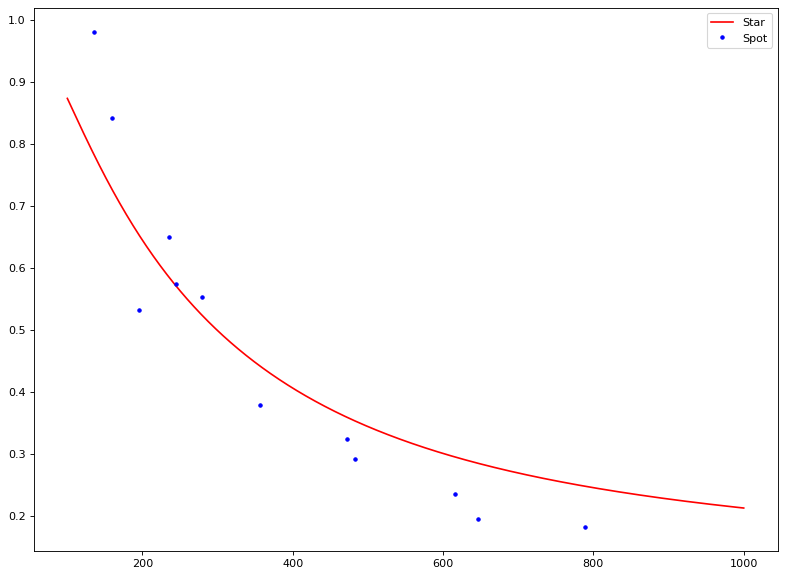

In [125]:
plt.figure()
figure(figsize=(12, 9), dpi=80)
plt.plot(wavelengths2*1e9, contrast_60, 'r-', label='Star') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Spot')
plt.legend()
plt.show()

In [126]:
temp_60

6779

# 60 Degrees - No Segments

In [129]:
contrast_2 = np.array([0.18234,
0.19376,
0.23545,
0.29142,
0.32339,
0.37836])

wavelengths_2 = np.array([788.7781855, 646.375, 615.8435393, 482.950, 471.8872246, 356.5647932])*1e-9

Star_test = planck(wavelengths_2, 7510)

In [130]:
temp_60_2, contrast_60_2 = find_temp(contrast_2, wavelengths_2)

<Figure size 432x288 with 0 Axes>

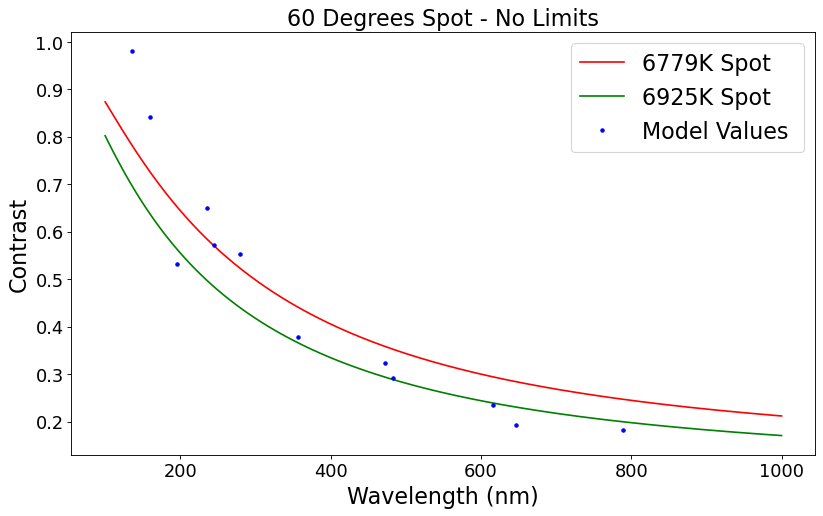

In [131]:
plt.figure()
figure(figsize=(12, 7), dpi=80)
plt.plot(wavelengths2*1e9, contrast_60, 'r-', label=str(temp_60)+'K Spot') 
plt.plot(wavelengths2*1e9, contrast_60_2, 'g-', label=str(temp_60_2)+'K Spot') 
plt.plot(wavelengths*1e9, contrast, 'b.', label='Model Values ')
plt.legend(fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)
plt.ylabel("Contrast", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("60 Degrees Spot - No Limits", fontsize=20)
plt.show()

In [132]:
temp_60_2

6925